### Import Libraries

In [133]:
import pandas as pd # Data processing 
import numpy as np 
import matplotlib.pyplot as plt # Data visualisation
import seaborn as sns # Data visualisation
import missingno as msno # Missing Data - Data visualisation
from collections import Counter #Counting

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [134]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [135]:
# print the bottom rows
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [136]:
# print the # print the bottom rows
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [137]:
# examine the features ( columns )
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [138]:
# data verification for anomalies and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Insight

• The dataset shows balanced data quality with no missing values and has consistent data types.

• The feature types include a mixture of demographic features (age, gender), lifestyle (smoking history), comorbidities (hypertension, hear disease), and clinical markers (BMI, HbA1c, glucose).

• Only 8.5% of individuals are diabetic, requiring imbalance-handling methods for fair and accurate machine learning models

In [139]:
# The column "age" is a float and should be converted to an object

df['age'] = df['age'].astype(int)

In [140]:
# dimensionality (exploring the number of rows and columns)
df.dtypes

gender                  object
age                      int32
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [141]:
# Numerical and statistical Analysis
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.875660,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.535417,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Observations

The dataset reflects a broad and diverse population with meaningful clinical variation.

Key points include:

• High BMI, HbA1c, and glucose levels are common, making the dataset well-suited for studying metabolic risk factors for diabetes.

• Hypertension and heart disease occur at lower rates but still provide valuable insight into links between cardiovascular health and diabetes

• The relatively small proportion of diabetic cases must be addressed to ensure balanced and reliable predictive modeling.

• Outliers in BMI and the inclusion of neonates in the age variable highlight the need for careful data checks before further analysis.

In [142]:
# categorical statistical Analysis
df.describe(include = ["object", "bool"])

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


#### Data Cleaning

In [143]:
# check for missing values
null_vals = df.isnull().sum()
null_vals

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

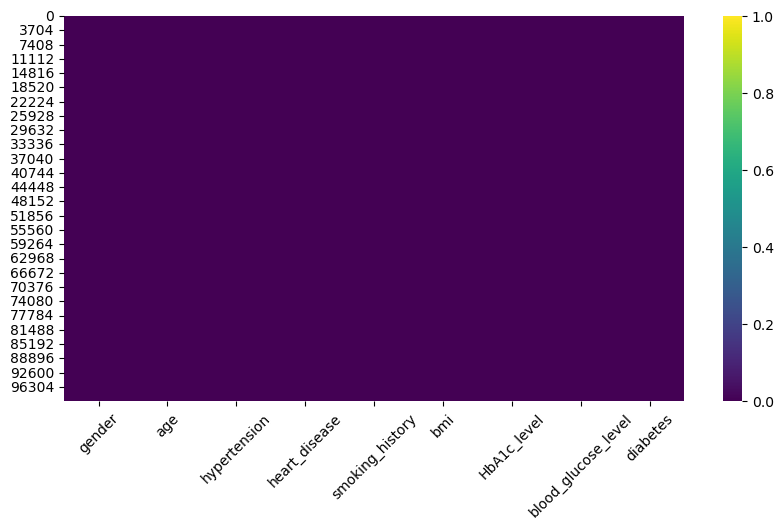

In [144]:
# visualise for missing values

plt.figure(figsize=(10,5))
sns.heatmap(data = df.isnull(), cmap = "viridis", vmin = 0, vmax = 1)
plt.xticks(rotation = 45)
plt.show();

In [145]:
# Group by diagnosis
df.diabetes.unique()

array([0, 1], dtype=int64)

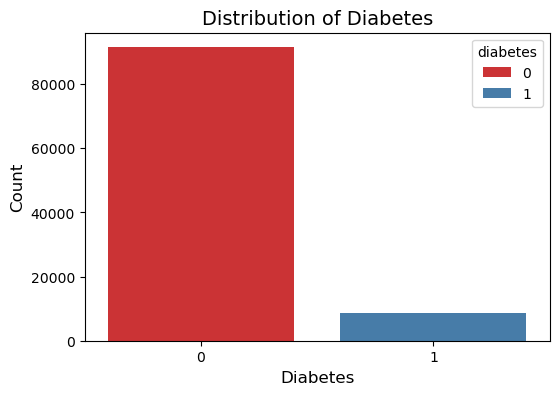

diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64


In [146]:
# Plot the distribution of diabetes
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='diabetes', hue= 'diabetes', palette='Set1')
plt.title('Distribution of Diabetes', fontsize=14)
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Calculate the percentage of diabetic and non-diabetic patients
diabetes_counts = df['diabetes'].value_counts(normalize=True) * 100
print(diabetes_counts)

In [147]:
df.diabetes.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

### Exploratory Data Analysis

#### Numerical Data

In [148]:
numerical_df =df.select_dtypes(exclude = "object")
numerical_df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80,0,1,25.19,6.6,140,0
1,54,0,0,27.32,6.6,80,0
2,28,0,0,27.32,5.7,158,0
3,36,0,0,23.45,5.0,155,0
4,76,1,1,20.14,4.8,155,0


In [149]:
numerical_df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [150]:
numerical_cols = numerical_df.columns
numerical_cols

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

#### Univariate Analysis

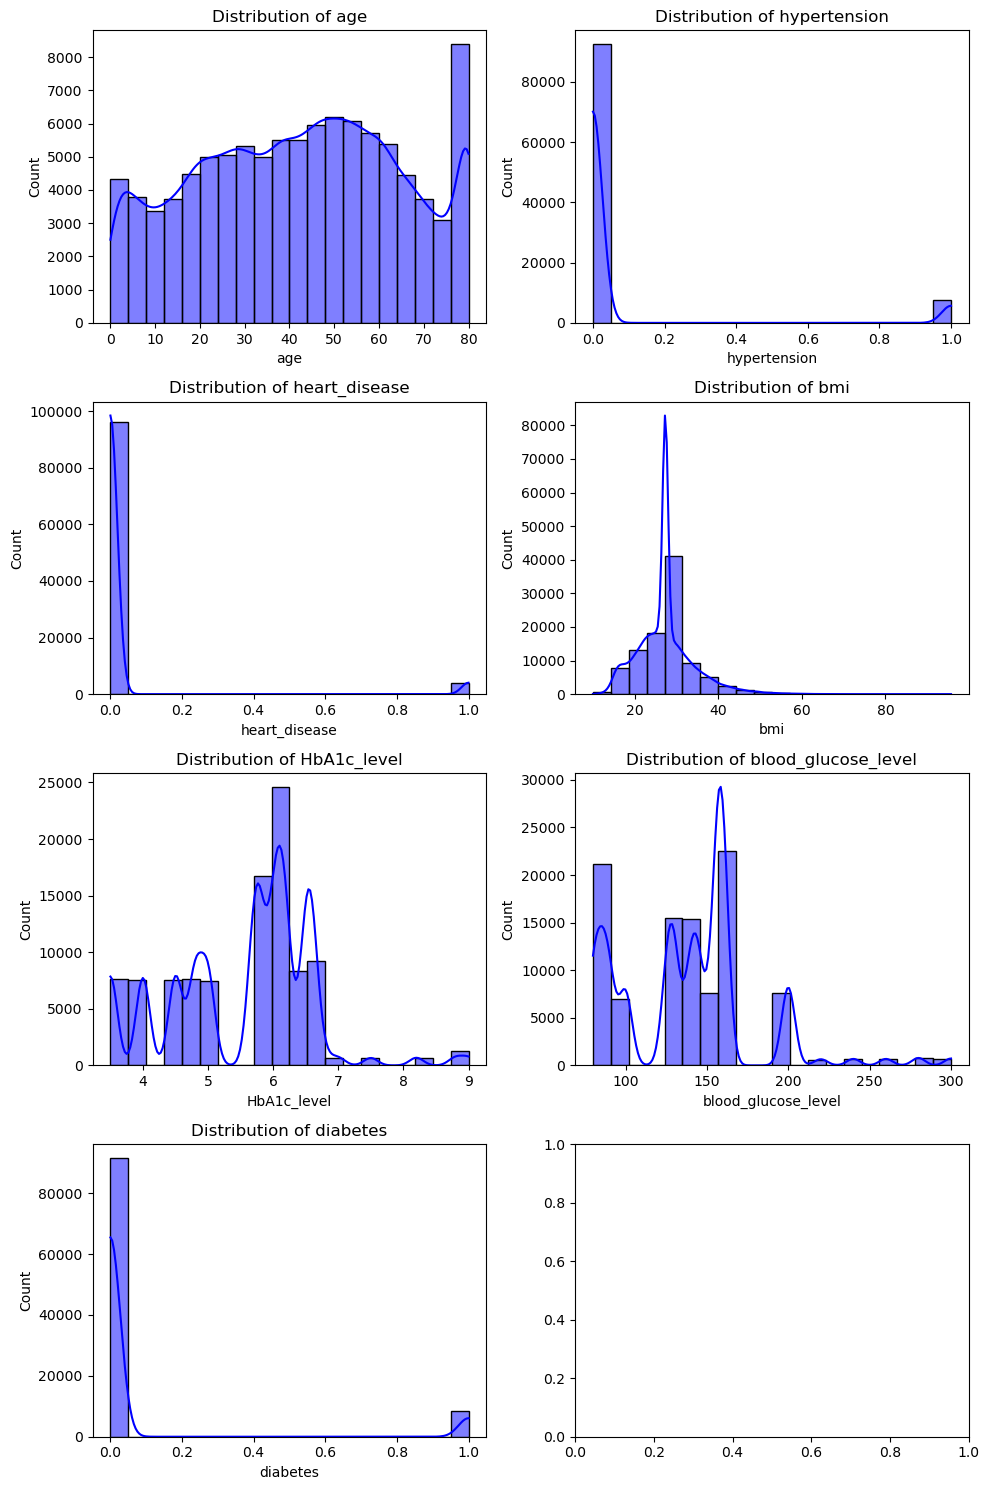

In [151]:
numerical_cols = numerical_df.columns

n_features = len(numerical_cols)
num_cols = 2
num_rows = (n_features +1)//num_cols

fig, axes = plt.subplots(ncols = num_cols, nrows = num_rows, figsize = (10,15))

position = axes.flatten()
for index, name_of_feature in enumerate (numerical_cols):
    sns.histplot(data=df[name_of_feature], bins=20, color="blue", kde=True, ax=position[index])
    position[index].set_title(f"Distribution of {name_of_feature}")
   
plt.tight_layout();

Insight

• The dataset is demographically broad with individuals across all ages, but skewed toward middle-aged and older adults.

• Hypertension is relatively rare in this population (~10%), which could impact analyses involving comorbidities.

• Heart disease is relatively rare (~5%), highlighting a class imbalance similar to hypertension.

• The population shows a high prevalence of overweight and obesity.

• The majority of individuals fall into the non-diabetic group

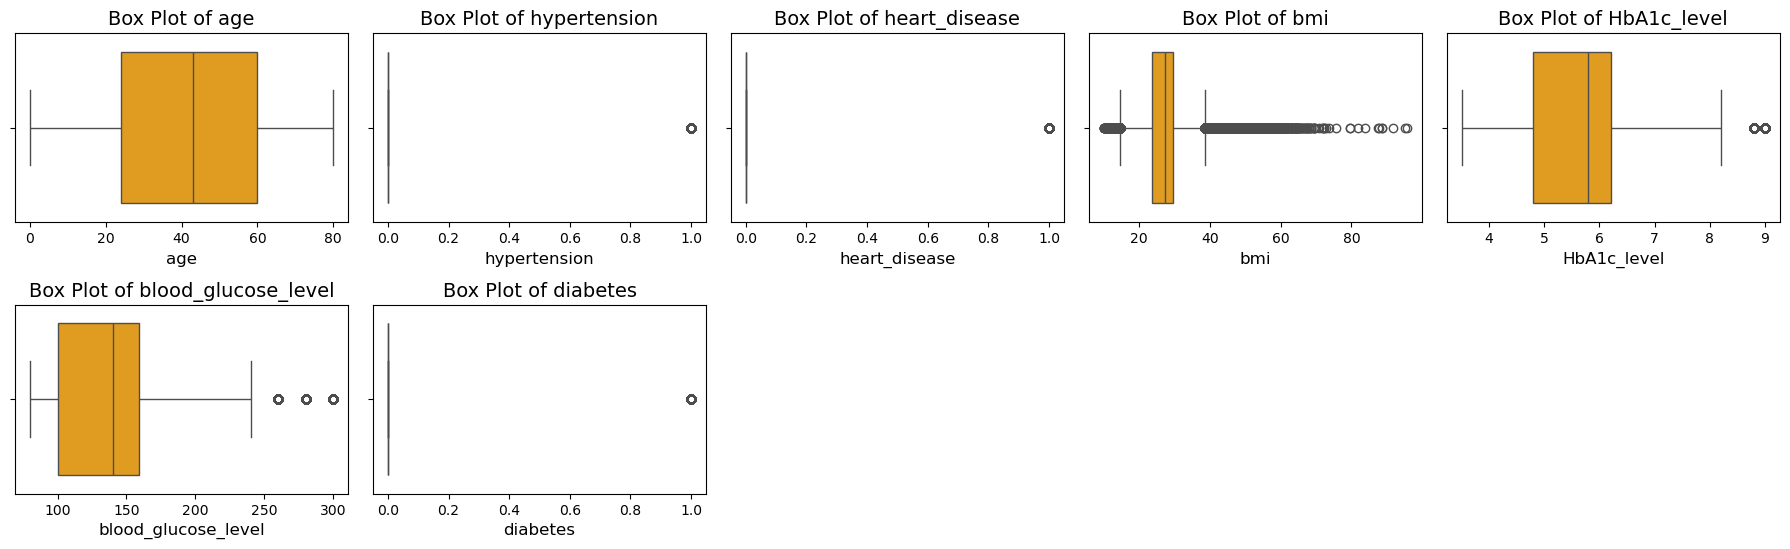

In [152]:
# List of numerical features for univariate analysis
numerical_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

# Set up the plot grid  
plt.figure(figsize=(18, 16))

# Create box plots for each numerical feature 
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(6, 5, i)
    sns.boxplot(data=df, x=feature, color='orange')
    plt.title(f'Box Plot of {feature}', fontsize=14)
    plt.grid(False)  # Remove gridlines
    plt.xlabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Boxplot on Blood Glucose Level')

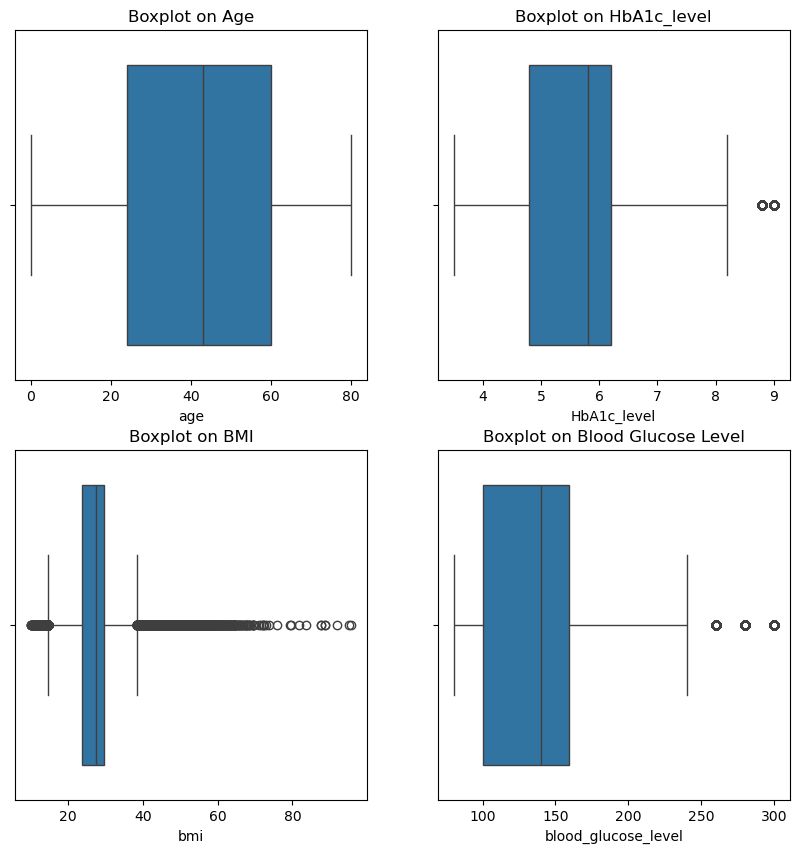

In [153]:
fig,axs = plt.subplots(nrows=2,ncols=2, figsize=(10,10))

sns.boxplot(x="age", data=df, ax=axs[0,0])
axs[0,0].set_title("Boxplot on Age")

sns.boxplot(x="bmi", data=df, ax=axs[1,0])
axs[1,0].set_title("Boxplot on BMI");

sns.boxplot(x="HbA1c_level", data=df, ax=axs[0,1])
axs[0,1].set_title("Boxplot on HbA1c_level")

sns.boxplot(x="blood_glucose_level", data=df, ax=axs[1,1])
axs[1,1].set_title("Boxplot on Blood Glucose Level")

Insight

• The dataset contains participants across a wide age spectrum, with most being middle-aged adults. The distribution looks roughly symmetric, suggesting that both younger and older individuals are fairly represented.

• Most individuals have HbA1c levels within a healthy to mildly elevated range, but the presence of outliers suggests that some participants have significantly higher blood sugar levels.

• The BMI data is right-skewed, meaning a small number of individuals have very high BMI values and a large number of outliers.

• The blood glucose level distribution is slightly right-skewed, showing that most participants have glucose levels within or slightly above the normal range, with the presence of high-end outliers

In [154]:
# Handling Outliers
numeric_columns = ['HbA1c_level', 'bmi','blood_glucose_level']
def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Winsorization: Cap outliers instead of removing them
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        
        print(f"Outliers handled for '{col}' | Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    return df

df = handle_outliers(df, numeric_columns)

Outliers handled for 'HbA1c_level' | Lower bound: 2.70, Upper bound: 8.30
Outliers handled for 'bmi' | Lower bound: 14.71, Upper bound: 38.50
Outliers handled for 'blood_glucose_level' | Lower bound: 11.50, Upper bound: 247.50


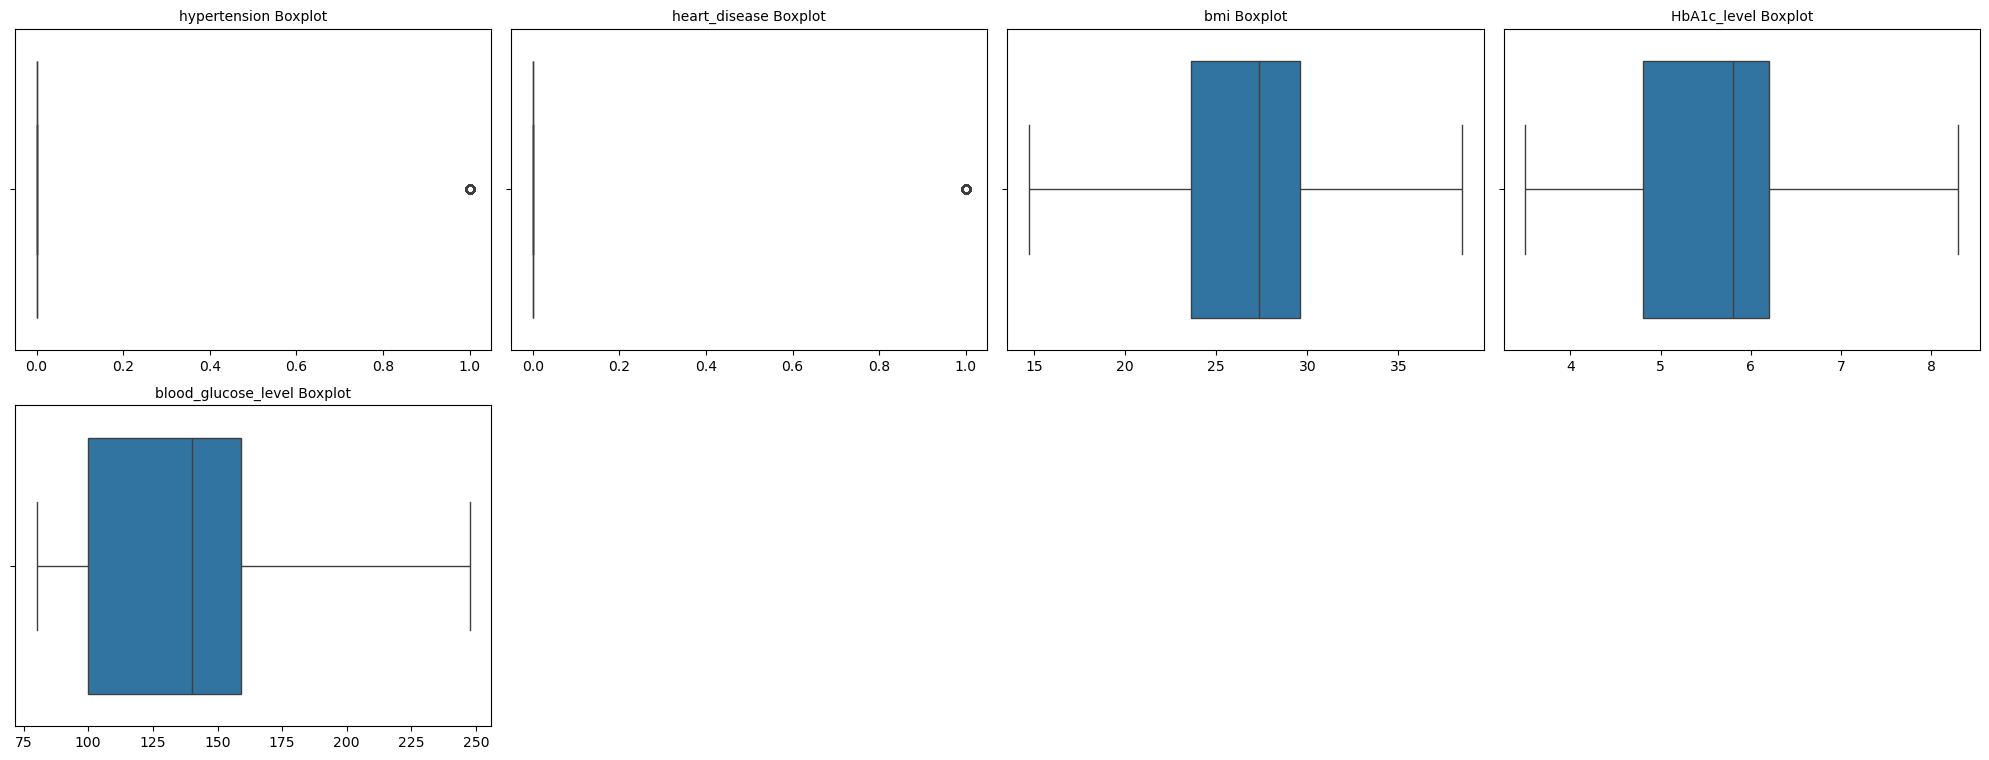

In [155]:
import math

def visualize_df(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    numeric_columns.pop() # remove active

    n_cols = 4
    n_rows = math.ceil(len(numeric_columns) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(numeric_columns):
        sns.boxplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f"{col} Boxplot", fontsize=10)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("") 

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

visualize_df(df)

In [156]:
#### Correlation Matrix for Numerical Variables

In [157]:
### Correlation

df.corr(numeric_only = True)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251093,0.233254,0.380794,0.097074,0.102441,0.257933
hypertension,0.251093,1.000000,0.121262,0.151447,0.077573,0.078007,0.197823
heart_disease,0.233254,0.121262,1.000000,0.069390,0.064703,0.064398,0.171727
bmi,0.380794,0.151447,0.069390,1.000000,0.078333,0.083048,0.209656
HbA1c_level,0.097074,0.077573,0.064703,0.078333,1.000000,0.147483,0.384753
blood_glucose_level,0.102441,0.078007,0.064398,0.083048,0.147483,1.000000,0.386446
diabetes,0.257933,0.197823,0.171727,0.209656,0.384753,0.386446,1.000000


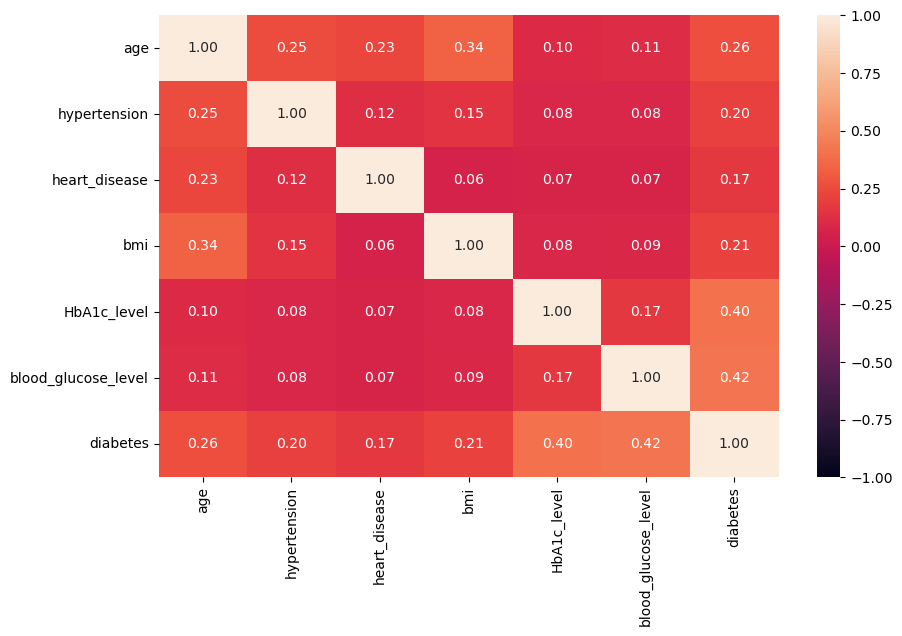

In [158]:
plt.figure(figsize = (10,6))
sns.heatmap(data = numerical_df.corr(), cbar=True, vmin= -1 , vmax= 1, fmt= ".2f", annot=True) 
plt.show();

Insight

• Age demonstrates a moderate positive correlation with BMI (r = 0.34), suggesting that body mass tends to increase with age. Additionally, age is positively associated with hypertension (r = 0.25) and heart disease (r = 0.23), indicating that older individuals are more susceptible to cardiovascular conditions. The correlation between age and diabetes (r = 0.26) further implies that advancing age increases the likelihood of developing diabetes.

• The relationship between hypertension and heart disease (r = 0.12) is positive but weak. Although the correlation strength is weak, it still reflects a clinically meaningful link between the two cardiovascular risk factors.

• HbA1c level and blood glucose level show moderate positive correlations with diabetes (r = 0.40 and r = 0.42, respectively), emphasizing their diagnostic importance. These findings validate their use as primary predictors in diabetes classification and risk assessment.

• BMI shows moderate positive correlations with age (r = 0.34) and diabetes (r = 0.21), which suggests that higher body weight is a significant risk factor for diabetes.

• Blood glucose level (r = 0.42) and HbA1c_level (r = 0.40) exhibited the strongest positive correlations with diabetes, followed by BMI (r = 0.21), age (r = 0.26), and hypertension (r = 0.20).

• In summary, the correlation analysis highlights that diabetes is most strongly associated with elevated HbA1c and blood glucose levels, followed by higher BMI, older age and hypertension.

#### Categorical Data

In [159]:
categorical_df = df.select_dtypes(include = "object")
categorical_df.head()

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current


In [160]:
categorical_df.columns

Index(['gender', 'smoking_history'], dtype='object')

In [161]:
categorical_cols = categorical_df.columns
categorical_cols

Index(['gender', 'smoking_history'], dtype='object')

#### Univariate Analysis

In [162]:
# Gender distribution

gender_count = df["gender"].value_counts()
gender_count

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

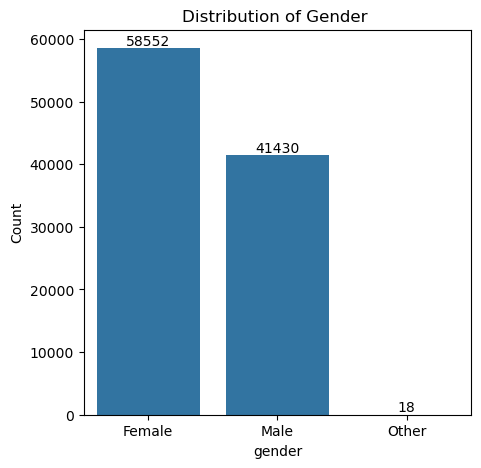

In [163]:
# visualize the gender distribution 

plt.figure(figsize=(5,5))
ax=sns.barplot(x=gender_count.index, y=gender_count.values);
values = df["gender"].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values);

plt.title("Distribution of Gender ")
plt.ylabel("Count")
plt.show();

In [164]:
# Smoking History

smh_count = df["smoking_history"].value_counts()
smh_count

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

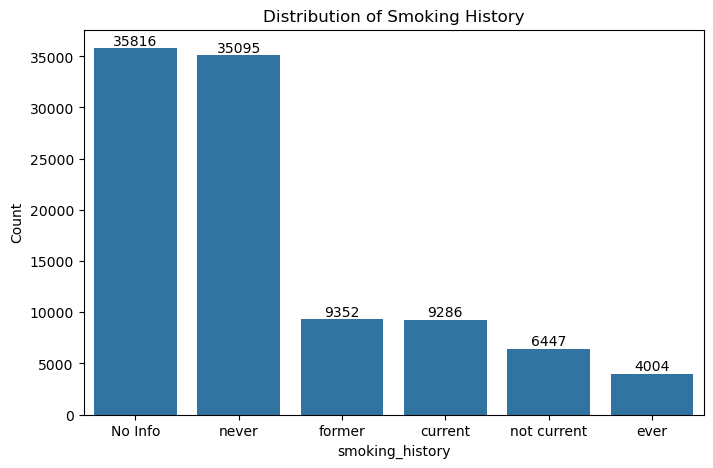

In [165]:
# visualize Smoke History Distribution 

plt.figure(figsize=(8,5))
ax=sns.barplot(x=smh_count.index, y=smh_count.values);
values = df["smoking_history"].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values);

plt.title("Distribution of Smoking History")
plt.ylabel("Count")
plt.show();

### Bivariate Analysis

#### Numerical vs Numerical

In [166]:
numerical_df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

Text(0.5, 1.0, 'Comparision between Age and Blood Glucose Level')

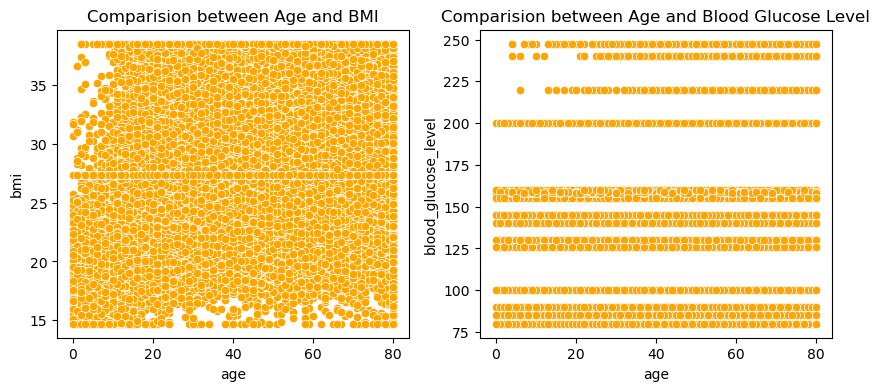

In [167]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

position=axes.flatten()

sns.scatterplot(x=df["age"], y=df["bmi"], color = "orange", ax=position[0])
position[0].set_title(f"Comparision between Age and BMI")

sns.scatterplot(x=df["age"], y=df["blood_glucose_level"], color = "orange", ax=position[1])
position[1].set_title(f"Comparision between Age and Blood Glucose Level")

Observation

• Both graphs indicate that while age alone is not a strong predictor of BMI or glucose levels, middle-aged and older adults tend to show higher BMI and elevated glucose

### Categorical vs Numerical

In [168]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140.0,0
1,Female,54,0,0,No Info,27.32,6.6,80.0,0
2,Male,28,0,0,never,27.32,5.7,158.0,0
3,Female,36,0,0,current,23.45,5.0,155.0,0
4,Male,76,1,1,current,20.14,4.8,155.0,0


In [169]:
categorical_cols

Index(['gender', 'smoking_history'], dtype='object')

In [170]:
categorical_df.head(2)

,gender,smoking_history
0,Female,never
1,Female,No Info


In [171]:
df["gender"].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

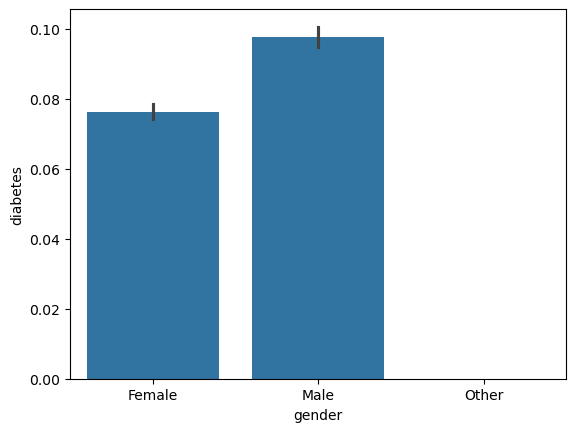

In [172]:
#comparing gender and diabetes

sns.barplot(x="gender", y="diabetes", data=df);

Insight

• Males have a higher proportion of diabetes cases compared to females — around 9.8% of males are diabetic.

• Females show a slightly lower rate, around 7.6%.

• The category “Other” shows no recorded cases, likely because it has few or no data points in the dataset.

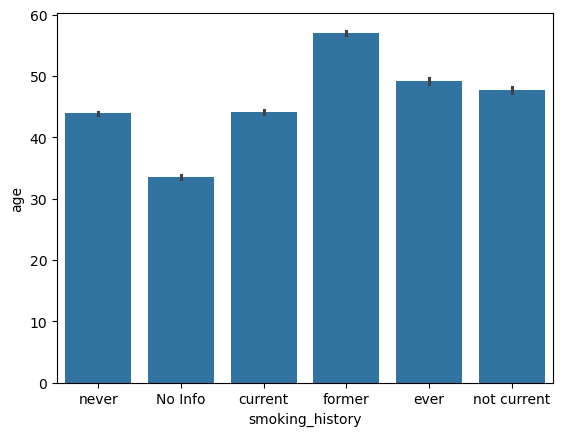

In [173]:
#comparing smoking history and age

sns.barplot(x="smoking_history", y="age", data=df);

Insight

• This bar graph illustrates the relationship between smoking history and average age of individuals.

• Former smokers have the highest average age (around 57–58 years). This suggests that people who have quit smoking tend to be older, possibly because they smoked earlier in life and latter stopped

• Ever smokers and not current smokers also have relatively high average ages (around 48–50 years), indicating that these groups consist mostly of middle-aged or older adults

• Current smokers have a moderate average age (around 44 years), suggesting that smoking is more common among younger or middle-aged adults.

• Never smokers show a similar average age (around 43–44 years), meaning that many non-smokers are also in the middle-age range

• The “No Info” group has the lowest average age (around 33 years), which might imply missing data for younger participants or incomplete smoking history reporting

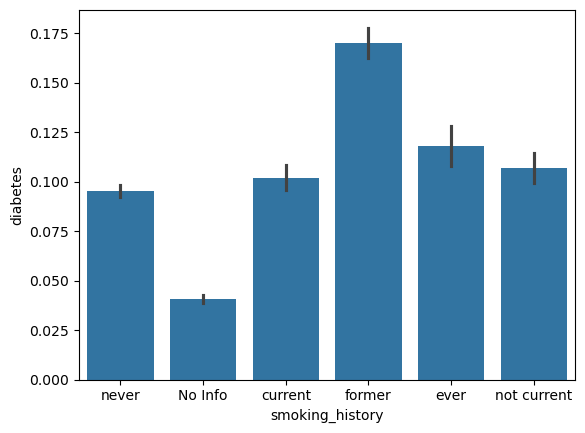

In [174]:
#comparing smoking history and diabetes

sns.barplot(x="smoking_history", y="diabetes", data=df);

Insight

• The bar graph shows the relationship between smoking history and diabetes prevalence.

• Former smokers have the highest diabetes rate (around 17%), suggesting a strong link between past smoking and diabetes risk and no smoking information have the lowest recorded rate (about 4%) but this category likely reflects missing or incomplete data rather than a true pattern.

• Never smokers have a lower diabetes rate (about 9%), suggesting that not smoking may be protective.

• Current smokers, ever smokers, and not current smokers also show moderate diabetes rates (around 10–12%), indicating continued risk even after changing smoking habits

#### Bivariate Analysis

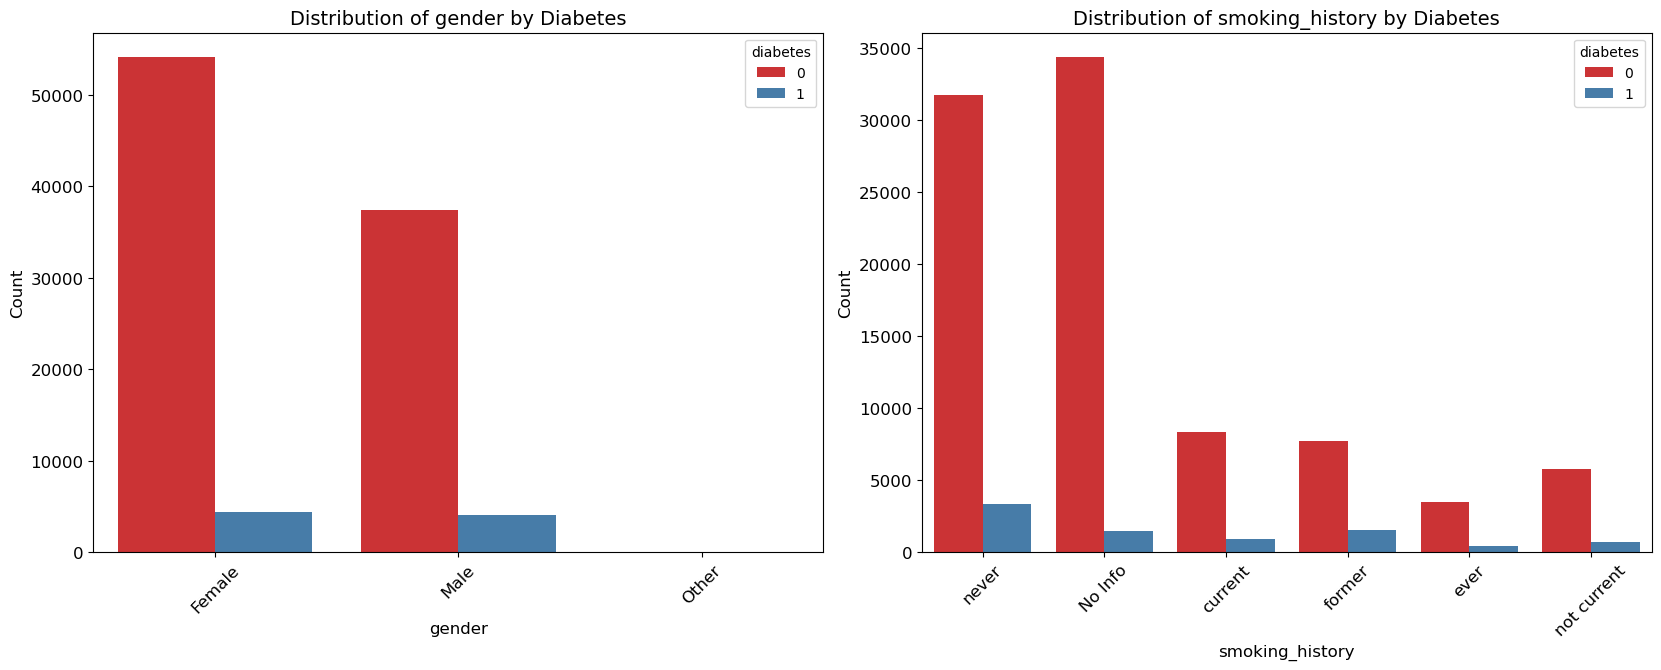

In [175]:
#set up the plot grid
plt.figure(figsize=(25,25))

# Create bar plots for each categorical feature with default as hue
for index, feature in enumerate (categorical_cols, 1):
    plt.subplot(4,3,index)
    sns.countplot (data=df, x=feature, hue='diabetes', palette='Set1')
    plt.title(f'Distribution of {feature} by Diabetes', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
plt.tight_layout()
plt.show()

Insight

• Both males and females without diabetes (red bars, diabetes = 0) far outnumber those with diabetes (blue bars, diabetes = 1). Females represent the largest proportion of the dataset overall, both among diabetic and non-diabetic individuals. The “Other” gender category is nearly negligible, suggesting either very few entries or missing data.

• The majority of individuals, regardless of diabetes status, are categorized as “never” smokers or with “no information” and the counts for “current,” “former,” and “ever” smokers are significantly lower. Among all smoking categories, non-diabetic individuals (red bars) vastly outnumber diabetic individuals (blue bars). However, within diabetic cases (blue bars), the proportion of “current” and “former” smokers is slightly higher compared to non-diabetics.

### Modeling Diabetes Prediction

#### Data Pre-processing/Feature Engineering

In [176]:
df.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140.0,0
1,Female,54,0,0,No Info,27.32,6.6,80.0,0
2,Male,28,0,0,never,27.32,5.7,158.0,0


In [177]:
### Features and Label

# x = Features
# y = Label

In [178]:
x = df.drop(['diabetes'], axis=1)
y = df['diabetes']

In [179]:
x.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80,0,1,never,25.19,6.6,140.0
1,Female,54,0,0,No Info,27.32,6.6,80.0
2,Male,28,0,0,never,27.32,5.7,158.0


In [180]:
y.head(3)

0    0
1    0
2    0
Name: diabetes, dtype: int64

### Encoding all Categorical variables

In [181]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [182]:
for column_name in categorical_cols:
    x[column_name]=encoder.fit_transform(df[column_name])
x.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80,0,1,4,25.19,6.6,140.0
1,0,54,0,0,0,27.32,6.6,80.0
2,1,28,0,0,4,27.32,5.7,158.0


### Data Splitting

In [183]:
print(f"Data contained {len(x)} records before splitting")

Data contained 100000 records before splitting


In [184]:
# Splitting Data into Training and Test sets 

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [185]:
xtrain.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75220,1,73,0,0,3,24.77,3.5,80.0
48955,1,80,0,0,4,24.60,5.7,145.0
44966,0,38,0,0,2,24.33,4.0,158.0
13568,0,26,0,0,5,18.87,5.0,100.0
92727,0,61,1,0,1,22.11,4.5,85.0


In [186]:
xtest.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75721,0,13,0,0,0,20.820,5.8,126.0
80184,0,3,0,0,0,21.000,5.0,145.0
19864,1,63,0,0,3,25.320,3.5,200.0
76699,0,2,0,0,4,17.430,6.1,126.0
92991,0,33,0,0,5,38.505,6.2,200.0


In [187]:
len(xtest) == len(ytest)

True

In [188]:
len(xtrain) == len(ytrain)

True

### Model Training

In [189]:
# Initialize and train classification models

Classification_Models = [
    (SGDClassifier(loss="log_loss", random_state=42, max_iter=2000),'sgd_model'),
    (DecisionTreeClassifier(random_state=42),'dt_model'),
    (LogisticRegression(random_state=42, max_iter=5000, solver="lbfgs"),'lr_model'),
    (RandomForestClassifier(random_state=42, n_jobs=-1), 'rf_model'),
    (XGBClassifier(random_state=42, eval_metric='logloss', n_jobs=-1),'xgb_model'),
    (KNeighborsClassifier(),'knn_model')
]

In [190]:
Classification_Models

[(SGDClassifier(loss='log_loss', max_iter=2000, random_state=42), 'sgd_model'),
 (DecisionTreeClassifier(random_state=42), 'dt_model'),
 (LogisticRegression(max_iter=5000, random_state=42), 'lr_model'),
 (RandomForestClassifier(n_jobs=-1, random_state=42), 'rf_model'),
 (XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='logloss',
                feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, n_estimators=100, n_jobs=-1,
                num_parallel_tree

In [191]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate

<--- sgd_model --->
Classification Report:
               precision    recall  f1-score   support

           0    0.97201   0.97392   0.97297     18292
           1    0.71471   0.69965   0.70710      1708

    accuracy                        0.95050     20000
   macro avg    0.84336   0.83679   0.84003     20000
weighted avg    0.95004   0.95050   0.95026     20000

Confusion Matrix:
 [[17815   477]
 [  513  1195]]


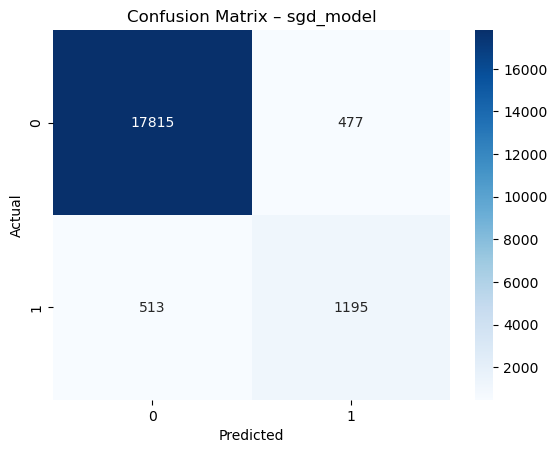

------------------------------------------------------------
<--- dt_model --->
Classification Report:
               precision    recall  f1-score   support

           0    0.97506   0.97256   0.97381     18292
           1    0.71396   0.73361   0.72365      1708

    accuracy                        0.95215     20000
   macro avg    0.84451   0.85308   0.84873     20000
weighted avg    0.95276   0.95215   0.95244     20000

Confusion Matrix:
 [[17790   502]
 [  455  1253]]


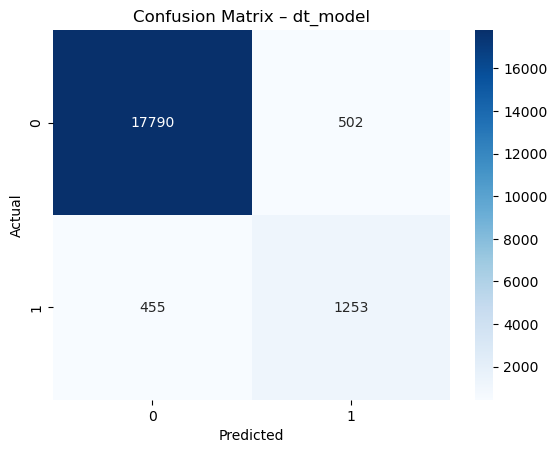

------------------------------------------------------------
<--- lr_model --->
Classification Report:
               precision    recall  f1-score   support

           0    0.96510   0.99016   0.97747     18292
           1    0.85401   0.61651   0.71608      1708

    accuracy                        0.95825     20000
   macro avg    0.90956   0.80334   0.84678     20000
weighted avg    0.95561   0.95825   0.95515     20000

Confusion Matrix:
 [[18112   180]
 [  655  1053]]


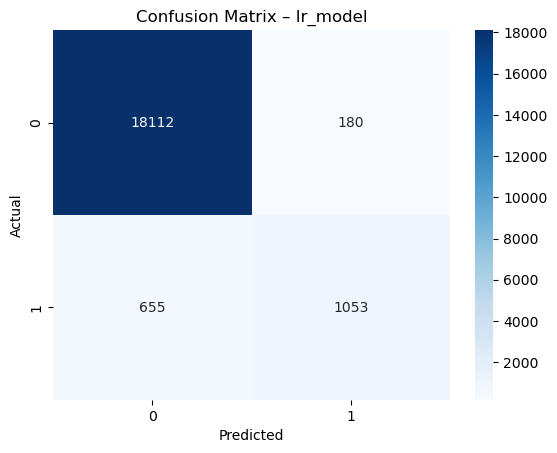

------------------------------------------------------------
<--- rf_model --->
Classification Report:
               precision    recall  f1-score   support

           0    0.97172   0.99574   0.98358     18292
           1    0.93790   0.68970   0.79487      1708

    accuracy                        0.96960     20000
   macro avg    0.95481   0.84272   0.88923     20000
weighted avg    0.96884   0.96960   0.96747     20000

Confusion Matrix:
 [[18214    78]
 [  530  1178]]


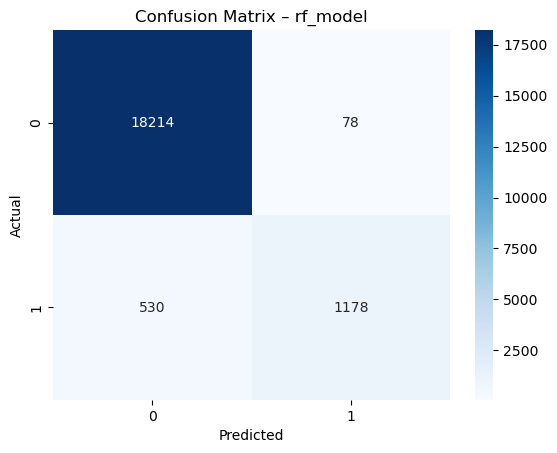

------------------------------------------------------------
<--- xgb_model --->
Classification Report:
               precision    recall  f1-score   support

           0    0.97163   0.99781   0.98455     18292
           1    0.96708   0.68794   0.80397      1708

    accuracy                        0.97135     20000
   macro avg    0.96935   0.84288   0.89426     20000
weighted avg    0.97124   0.97135   0.96912     20000

Confusion Matrix:
 [[18252    40]
 [  533  1175]]


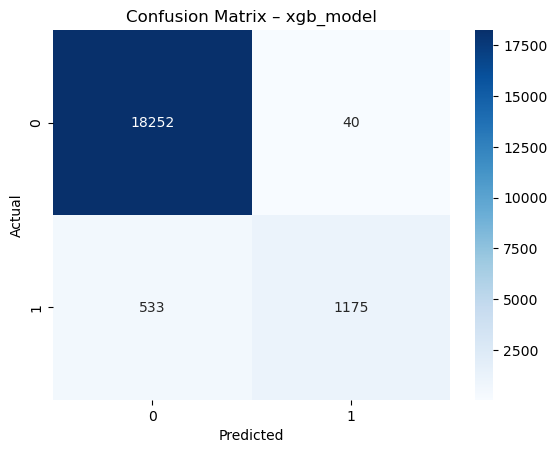

------------------------------------------------------------
<--- knn_model --->
Classification Report:
               precision    recall  f1-score   support

           0    0.95695   0.99278   0.97454     18292
           1    0.87097   0.52166   0.65251      1708

    accuracy                        0.95255     20000
   macro avg    0.91396   0.75722   0.81352     20000
weighted avg    0.94961   0.95255   0.94704     20000

Confusion Matrix:
 [[18160   132]
 [  817   891]]


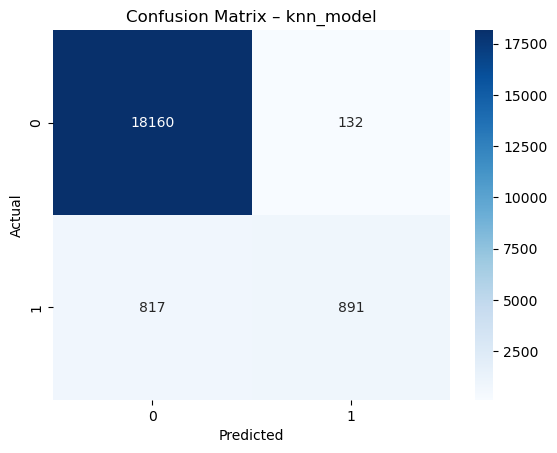

------------------------------------------------------------


In [192]:
c_results = []

for model, model_name in Classification_Models:
    print(f"<--- {model_name} --->")

    # Train model
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)

    # ROC-AUC handling
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(xtest)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(xtest)
    else:
        y_proba = None

    roc_auc = roc_auc_score(ytest, y_proba) if y_proba is not None else np.nan

    # Classification report
    print("Classification Report:\n",
          classification_report(ytest, y_pred, digits=5))

    matrix = confusion_matrix(ytest, y_pred)
    print("Confusion Matrix:\n", matrix)

    # Cross-validation metrics
    scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'roc_auc': 'roc_auc'
    }

    cv_results = cross_validate(model, xtrain, ytrain, cv=5, scoring=scoring, n_jobs=-1)

    # Save results
    c_results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(ytest, y_pred),
        'Precision': precision_score(ytest, y_pred),
        'Recall': recall_score(ytest, y_pred),
        'F1': f1_score(ytest, y_pred),
        'ROC-AUC': roc_auc,
        'CV Recall': cv_results['test_recall'].mean()
    })

    # Confusion matrix heatmap
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix – {model_name}')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("-" * 60)

In [193]:
# Results DataFrame
print("\n CLASSIFICATION MODELS WITHOUT CLASS WEIGHTS, SCALING, HYPERPARAMETER TUNING AND OPTIMIZATION \n")

c_results_df = pd.DataFrame(c_results)
c_results_df = c_results_df.sort_values(by='Recall', ascending=False)
c_results_df


 CLASSIFICATION MODELS WITHOUT CLASS WEIGHTS, SCALING, HYPERPARAMETER TUNING AND OPTIMIZATION 



,Model,Accuracy,Precision,Recall,F1,ROC-AUC,CV Recall
1,dt_model,0.95215,0.713960,0.733607,0.723650,0.853710,0.734099
0,sgd_model,0.95050,0.714713,0.699649,0.707101,0.958342,0.669310
3,rf_model,0.96960,0.937898,0.689696,0.794872,0.963978,0.684039
4,xgb_model,0.97135,0.967078,0.687939,0.803969,0.978779,0.685170
2,lr_model,0.95825,0.854015,0.616511,0.716083,0.960721,0.626473
5,knn_model,0.95255,0.870968,0.521663,0.652508,0.877478,0.524292


In [194]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [195]:
param_grids = {

    "lr_model": {
        "model__C": [0.01, 0.1, 1, 10],
        "model__penalty": ["l2"]
    },

    "dt_model": {
        "model__max_depth": [None, 5, 10, 20],
        "model__min_samples_split": [2, 5, 10],
        "model__min_samples_leaf": [1, 5, 10]
    },

    "rf_model": {
        "model__n_estimators": [100, 300],
        "model__max_depth": [None, 10, 20],
        "model__min_samples_leaf": [1, 5],
        "model__max_features": ["sqrt", "log2"]
    },

    "xgb_model": {
        "model__n_estimators": [100, 300],
        "model__max_depth": [3, 6],
        "model__learning_rate": [0.05, 0.1],
        "model__subsample": [0.8, 1.0],
        "model__colsample_bytree": [0.8, 1.0]
    },

    "sgd_model": {
        "model__alpha": [1e-4, 1e-3, 1e-2],
        "model__penalty": ["l2", "l1"]
    },

    "knn_model": {
        "model__n_neighbors": [3, 5, 7],
        "model__weights": ["uniform", "distance"],
        "model__p": [1, 2]   
    } 
}


 SCALED vs OPTIMIZED MODEL COMPARISON 


 SGD_MODEL 


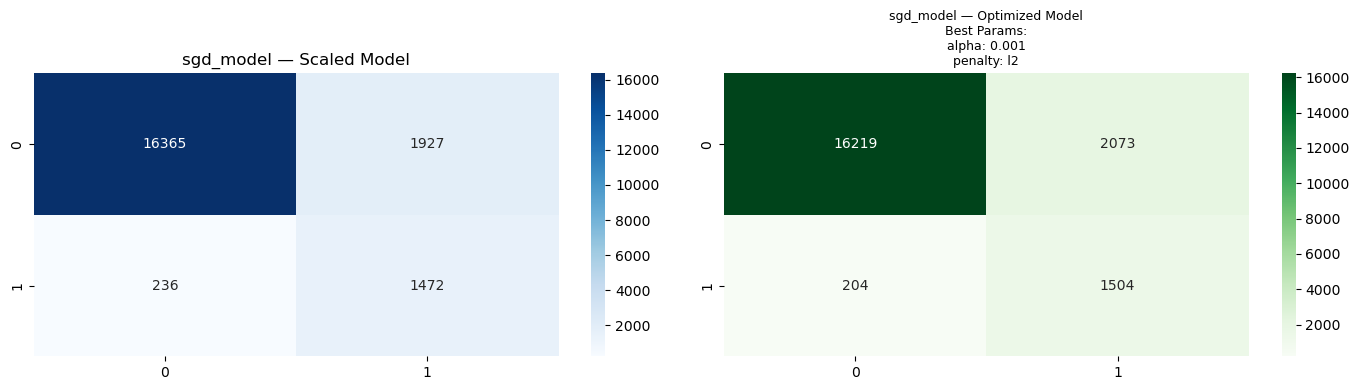


 DT_MODEL 


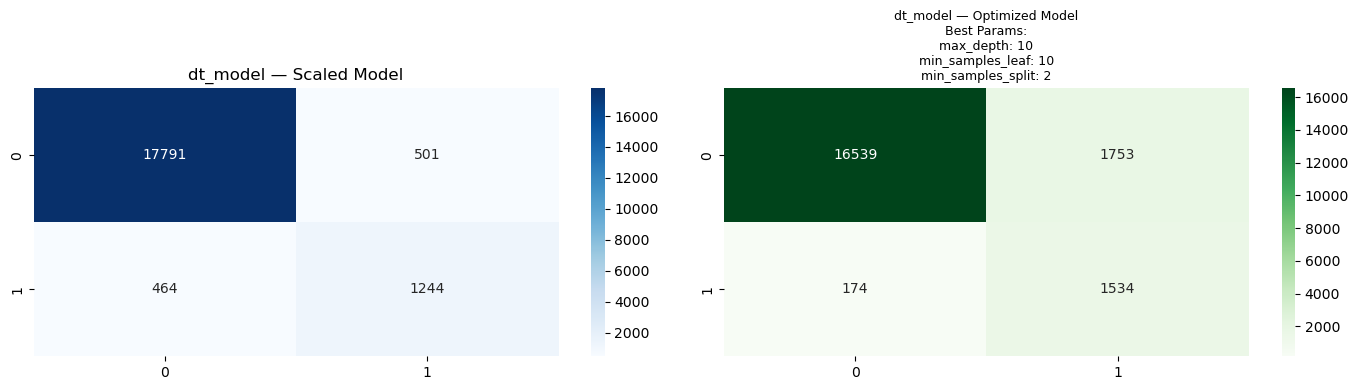


 LR_MODEL 


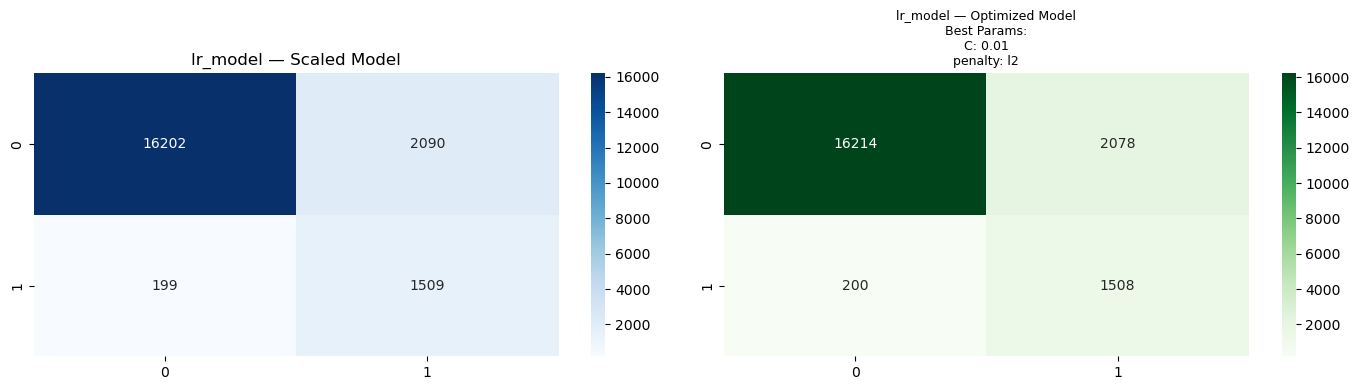


 RF_MODEL 


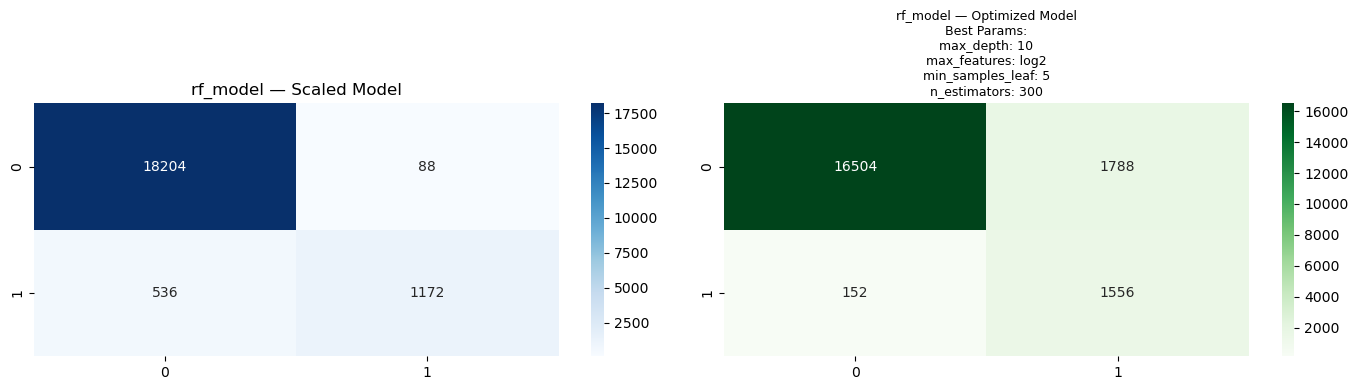


 XGB_MODEL 


C:\Users\josep\anaconda3\envs\mlenv2\lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


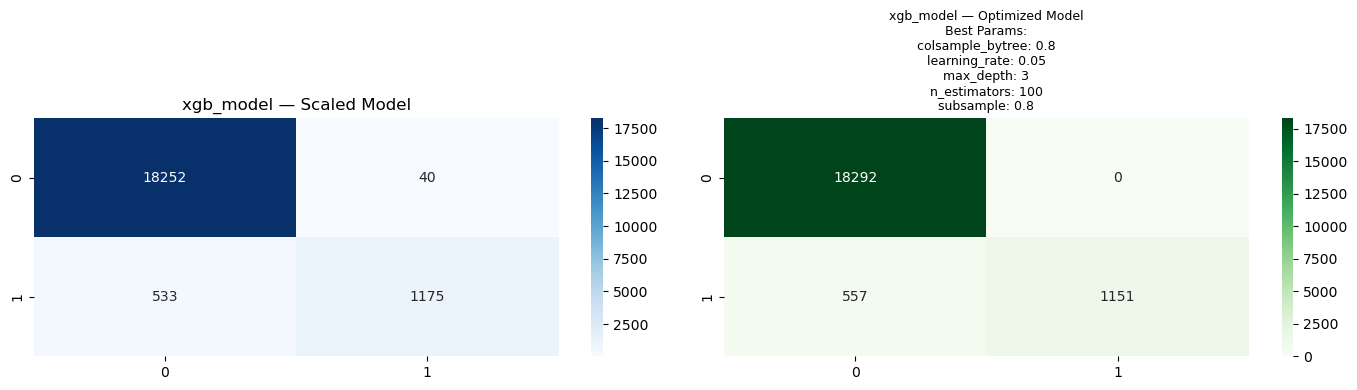


 KNN_MODEL 


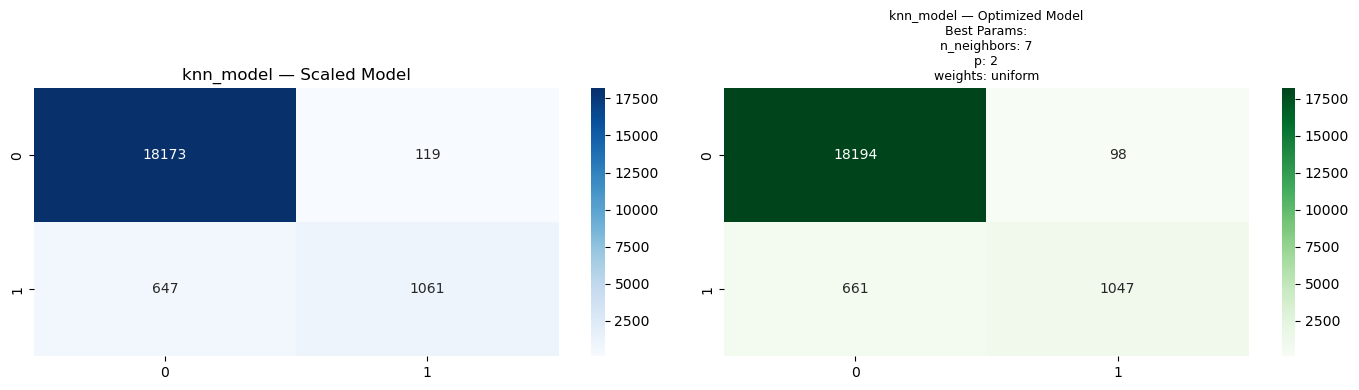

In [239]:
print("\n SCALED vs OPTIMIZED MODEL COMPARISON \n")

comparison_results = []
trained_for_shap = {}

best_model_name = None
best_model_for_shap = None
best_test_auc = -np.inf   # SHAP selection criterion

for model, model_name in Classification_Models:
    print(f"\n {model_name.upper()} ")

    #  SCALED MODEL 
    scaled_pipeline = Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("model", model)
    ])

    scaled_pipeline.fit(xtrain, ytrain)
    y_pred_scaled = scaled_pipeline.predict(xtest)

    scaled_model = scaled_pipeline.named_steps["model"]

    if hasattr(scaled_model, "predict_proba"):
        y_scores_scaled = scaled_pipeline.predict_proba(xtest)[:, 1]
    elif hasattr(scaled_model, "decision_function"):
        y_scores_scaled = scaled_pipeline.decision_function(xtest)
    else:
        y_scores_scaled = None

    default_metrics = {
        "Accuracy": accuracy_score(ytest, y_pred_scaled),
        "Precision": precision_score(ytest, y_pred_scaled, zero_division=0),
        "Recall": recall_score(ytest, y_pred_scaled),
        "F1": f1_score(ytest, y_pred_scaled),
        "ROC-AUC": roc_auc_score(ytest, y_scores_scaled)
        if y_scores_scaled is not None else np.nan
    }

    # OPTIMIZED MODEL 
    if hasattr(model, "class_weight"):
        model.set_params(class_weight="balanced")

    opt_pipeline = Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("model", model)
    ])

    grid = GridSearchCV(
        estimator=opt_pipeline,
        param_grid=param_grids[model_name],
        scoring="roc_auc",
        cv=5,
        n_jobs=-1
    )

    grid.fit(xtrain, ytrain)

    best_pipeline = grid.best_estimator_
    best_params = grid.best_params_
    best_cv_auc = grid.best_score_

    y_pred_opt = best_pipeline.predict(xtest)

    opt_model = best_pipeline.named_steps["model"]

    if hasattr(opt_model, "predict_proba"):
        y_scores_opt = best_pipeline.predict_proba(xtest)[:, 1]
    elif hasattr(opt_model, "decision_function"):
        y_scores_opt = best_pipeline.decision_function(xtest)
    else:
        y_scores_opt = None

    optimized_metrics = {
        "Accuracy": accuracy_score(ytest, y_pred_opt),
        "Precision": precision_score(ytest, y_pred_opt, zero_division=0),
        "Recall": recall_score(ytest, y_pred_opt),
        "F1": f1_score(ytest, y_pred_opt),
        "ROC-AUC": roc_auc_score(ytest, y_scores_opt)
        if y_scores_opt is not None else np.nan
    }

    #  CONFUSION MATRICES 
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    #  Scaled 
    sns.heatmap(
        confusion_matrix(ytest, y_pred_scaled),
        annot=True, fmt="d", cmap="Blues", ax=axes[0]
    )
    axes[0].set_title(f"{model_name} — Scaled Model")

    #  Optimized (WITH BEST PARAMS) 
    best_params_str = "\n".join(
        [f"{k.replace('model__','')}: {v}" for k, v in best_params.items()]
    )

    sns.heatmap(
        confusion_matrix(ytest, y_pred_opt),
        annot=True, fmt="d", cmap="Greens", ax=axes[1]
    )
    axes[1].set_title(
        f"{model_name} — Optimized Model\nBest Params:\n{best_params_str}",
        fontsize=9
    )

    plt.tight_layout()
    plt.show()

    #  RESULTS TABLE 
    comparison_results.append({
        "Model": model_name,
        "Best Params": best_params,
        "CV ROC-AUC": best_cv_auc,

        "Scaled Accuracy": default_metrics["Accuracy"],
        "Scaled Precision": default_metrics["Precision"],
        "Scaled Recall": default_metrics["Recall"],
        "Scaled F1": default_metrics["F1"],
        "Scaled ROC-AUC": default_metrics["ROC-AUC"],

        "Optimized Accuracy": optimized_metrics["Accuracy"],
        "Optimized Precision": optimized_metrics["Precision"],
        "Optimized Recall": optimized_metrics["Recall"],
        "Optimized F1": optimized_metrics["F1"],
        "Optimized ROC-AUC": optimized_metrics["ROC-AUC"],
    })

    #  SHAP MODEL SELECTION 
    trained_for_shap[model_name] = best_pipeline

In [240]:
print("\n============= SCALED vs OPTIMIZED MODEL COMPARISON ======\n")

comparison_df = pd.DataFrame(comparison_results)
comparison_df.sort_values("Optimized ROC-AUC", ascending=False)


============= SCALED vs OPTIMIZED MODEL COMPARISON ======



,Model,Best Params,CV ROC-AUC,Scaled Accuracy,Scaled Precision,Scaled Recall,Scaled F1,Scaled ROC-AUC,Optimized Accuracy,Optimized Precision,Optimized Recall,Optimized F1,Optimized ROC-AUC
3,rf_model,"{'model__max_depth': 10, 'model__max_features'...",0.976783,0.96880,0.930159,0.686183,0.789757,0.964000,0.90300,0.465311,0.911007,0.615994,0.977675
4,xgb_model,"{'model__colsample_bytree': 0.8, 'model__learn...",NaN,0.97135,0.967078,0.687939,0.803969,0.978781,0.97215,1.000000,0.673888,0.805177,0.976363
1,dt_model,"{'model__max_depth': 10, 'model__min_samples_l...",0.972328,0.95175,0.712894,0.728337,0.720533,0.850825,0.90365,0.466687,0.898126,0.614214,0.973106
2,lr_model,"{'model__C': 0.01, 'model__penalty': 'l2'}",0.960873,0.88555,0.419283,0.883489,0.568683,0.961123,0.88610,0.420524,0.882904,0.569702,0.961150
0,sgd_model,"{'model__alpha': 0.001, 'model__penalty': 'l2'}",0.960681,0.89185,0.433069,0.861827,0.576464,0.959616,0.88615,0.420464,0.880562,0.569158,0.960948
5,knn_model,"{'model__n_neighbors': 7, 'model__p': 2, 'mode...",0.921575,0.96170,0.899153,0.621194,0.734765,0.906287,0.96205,0.914410,0.612998,0.733964,0.922308


#### Insights

•	Among all evaluated models, XGBoost demonstrated the most favorable balance between precision, recall, and overall discrimination. It achieved the highest ROC-AUC and F1-score under both default and optimized thresholds, while maintaining exceptionally high precision even after threshold adjustment. This stability suggests well-calibrated probability estimates and robust modeling of non-linear feature interactions.


•	Random forest also exhibited strong discriminative performance but showed greater sensitivity to threshold changes, transitioning from a conservative classifier under the default threshold to a highly recall-oriented model after optimization. Linear models (LR and SGD) displayed comparatively stable behavior across thresholds, with consistently high recall but limited precision, reflecting the constraints of linear decision boundaries.


•	KNN and decision tree models demonstrated weaker robustness, with threshold optimization offering limited benefit for KNN and inducing instability in decision trees due to coarse probability estimates.


In [290]:
# ================= SELECT BEST MODEL FOR SHAP =================

comparison_df = pd.DataFrame(comparison_results)

best_model_row = comparison_df.sort_values(by="Optimized Precision", ascending=False).iloc[0]

best_model_name = best_model_row["Model"]
best_pipeline = trained_for_shap[best_model_name]

print("\n===== BEST MODEL FOR SHAP ANALYSIS =====")
print(best_model_row)



===== BEST MODEL FOR SHAP ANALYSIS =====
Model                                                          xgb_model
Best Params            {'model__colsample_bytree': 0.8, 'model__learn...
CV ROC-AUC                                                           NaN
Scaled Accuracy                                                  0.97135
Scaled Precision                                                0.967078
Scaled Recall                                                   0.687939
Scaled F1                                                       0.803969
Scaled ROC-AUC                                                  0.978781
Optimized Accuracy                                               0.97215
Optimized Precision                                                  1.0
Optimized Recall                                                0.673888
Optimized F1                                                    0.805177
Optimized ROC-AUC                                               0.976363
Name: 4, 

In [291]:
best_model = best_pipeline.named_steps["model"]

In [292]:
best_model.feature_importances_

array([0.        , 0.1032543 , 0.05829412, 0.03512292, 0.04468584,
       0.06360094, 0.40640482, 0.28863704], dtype=float32)

In [294]:
xtrain.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75220,1,73,0,0,3,24.77,3.5,80.0
48955,1,80,0,0,4,24.60,5.7,145.0


In [295]:
importance = best_model.feature_importances_

In [296]:
feature_names=xtrain.columns

In [297]:
feature_importance_df=pd.DataFrame({'Feature': feature_names, 'Importance': importance})

In [298]:
feature_importance_df

,Feature,Importance
0,gender,0.000000
1,age,0.103254
2,hypertension,0.058294
3,heart_disease,0.035123
4,smoking_history,0.044686
5,bmi,0.063601
6,HbA1c_level,0.406405
7,blood_glucose_level,0.288637


In [299]:
feature_importance_df=feature_importance_df.sort_values(by="Importance", ascending=False)
feature_importance_df

,Feature,Importance
6,HbA1c_level,0.406405
7,blood_glucose_level,0.288637
1,age,0.103254
5,bmi,0.063601
2,hypertension,0.058294
4,smoking_history,0.044686
3,heart_disease,0.035123
0,gender,0.000000


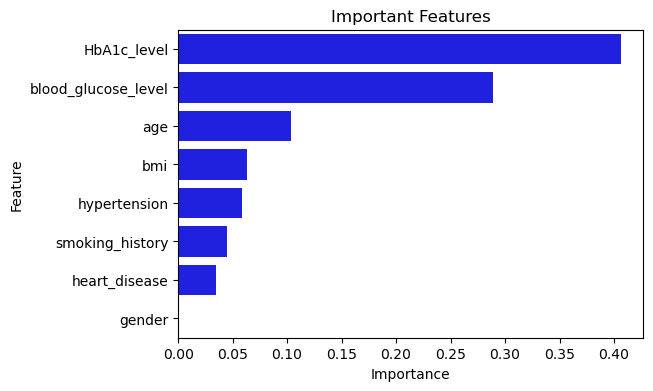

In [300]:
# plot a chart of important features 
plt.figure(figsize =(6, 4))
sns.barplot(data=feature_importance_df.sort_values(by="Importance", ascending = False), x="Importance", y="Feature", color="Blue")
plt.title("Important Features")
plt.show()

In [301]:
import shap

In [302]:
best_pipeline = trained_for_shap[best_model_name]
best_model = best_pipeline.named_steps["model"]

X_train_scaled = best_pipeline.named_steps["scaler"].transform(xtrain)
X_test_scaled  = best_pipeline.named_steps["scaler"].transform(xtest)

C:\Users\josep\AppData\Local\Temp\ipykernel_11976\4152196328.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


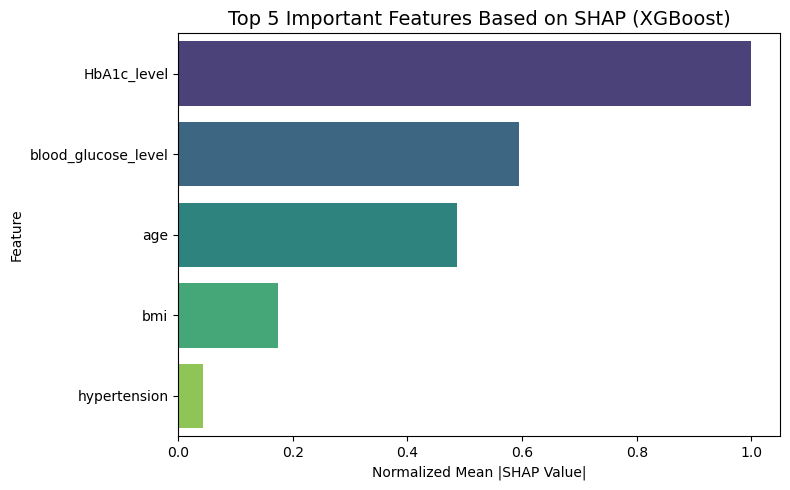

In [308]:

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_scaled)

if isinstance(shap_values, list):
    # Older SHAP: list per class
    shap_class_values = shap_values[1]

elif shap_values.ndim == 3:
    # Newer SHAP: (n_samples, n_features, n_classes)
    shap_class_values = shap_values[:, :, 1]

else:
    # Newer SHAP (XGBoost binary): already (n_samples, n_features)
    shap_class_values = shap_values

# Shap dataframe
shap_df = pd.DataFrame(
    shap_class_values,
    columns=xtest.columns
)

# Mean absolute SHAP values
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)

feature_importance_df = pd.DataFrame({
    "Feature": mean_shap_values.index,
    "Mean |SHAP Value|": mean_shap_values.values
})

scaler = MinMaxScaler()
feature_importance_df["Scaled |SHAP Value|"] = scaler.fit_transform(
    feature_importance_df[["Mean |SHAP Value|"]]
)

# Bar plot top 5 features
plt.figure(figsize=(8, 5))
sns.barplot(
    data=feature_importance_df.head(5),
    x="Scaled |SHAP Value|",
    y="Feature",
    palette="viridis")

plt.title("Top 5 Important Features Based on SHAP (XGBoost)", fontsize=14)
plt.xlabel("Normalized Mean |SHAP Value|")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


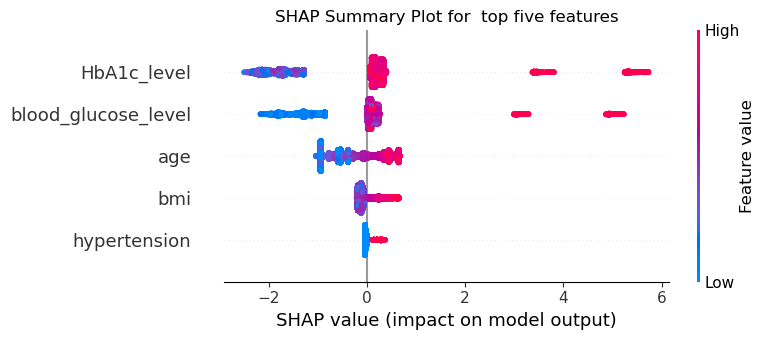

In [311]:
plt.title("SHAP Summary Plot for  top five features")
shap.summary_plot(shap_class_values, X_test_scaled, feature_names=xtest.columns, plot_type="dot", max_display=5)

#### ROC CURVES of Classification Models

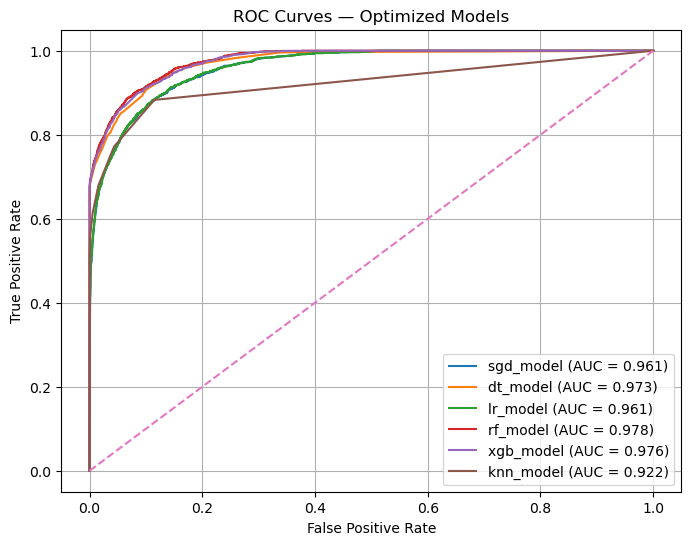

In [259]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for model_name, pipeline in trained_for_shap.items():
    model = pipeline.named_steps["model"]

    if hasattr(model, "predict_proba"):
        y_scores = pipeline.predict_proba(xtest)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = pipeline.decision_function(xtest)
    else:
        continue

    fpr, tpr, _ = roc_curve(ytest, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves — Optimized Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Regression Models

In [260]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [261]:
# Initialize and train regression models

Regression_Models = [
    (LinearRegression(), 'linear_reg'),
    (Ridge(), 'ridge_reg'),
    (Lasso(), 'lasso_reg'),
    (ElasticNet(), 'elasticnet_reg'),
    (DecisionTreeRegressor(random_state=42), 'dt_reg'),
    (RandomForestRegressor(random_state=42), 'rf_reg')
]

In [262]:
Regression_Models

[(LinearRegression(), 'linear_reg'),
 (Ridge(), 'ridge_reg'),
 (Lasso(), 'lasso_reg'),
 (ElasticNet(), 'elasticnet_reg'),
 (DecisionTreeRegressor(random_state=42), 'dt_reg'),
 (RandomForestRegressor(random_state=42), 'rf_reg')]

In [263]:
# Hypertuning of Regression Models

param_grids1 = {
    'linear_reg': {},

    'ridge_reg': {
        'model__alpha': [0.01, 0.1, 1, 10, 100]
    },

    'lasso_reg': {
        'model__alpha': [0.001, 0.01, 0.1, 1]
    },

    'elasticnet_reg': {
        'model__alpha': [0.001, 0.01, 0.1, 1],
        'model__l1_ratio': [0.2, 0.5, 0.8]
    },

    'dt_reg': {
        'model__max_depth': [None, 5, 10, 20],
        'model__min_samples_split': [2, 5, 10]
    },

    'rf_reg': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }
}

In [314]:

r_results1 = []
trained_for_shap1 = {}

best_model_name1 = None
best_model_for_shap1 = None
best_test_rmse = np.inf   

for model, name in Regression_Models:

    # Pipeline
    pipeline1 = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # GRID SEARCH 
    grid1 = GridSearchCV(
        estimator=pipeline1,
        param_grid=param_grids1.get(name, {}),
        cv=5,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )

    grid1.fit(xtrain, ytrain)

    best_pipeline1 = grid1.best_estimator_
    best_params1 = grid1.best_params_
    best_cv_rmse = -grid1.best_score_

    # Test Set Prediction
    y_pred = best_pipeline1.predict(xtest)

    # Metrics
    r2 = r2_score(ytest, y_pred)
    mae = mean_absolute_error(ytest, y_pred)
    mse = mean_squared_error(ytest, y_pred)
    rmse = np.sqrt(mse)

    # Correlations
    if np.std(y_pred) == 0 or np.std(ytest) == 0:
        pearson_r, pearson_p = np.nan, np.nan
        spearman_r, spearman_p = np.nan, np.nan
    else:
        pearson_r, pearson_p = pearsonr(ytest, y_pred)
        spearman_r, spearman_p = spearmanr(ytest, y_pred)

    # Results
    r_results1.append({
        'Model': name,
        'Best Params': best_params1,
        'CV RMSE': best_cv_rmse,
        'R2': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'Pearson r': pearson_r,
        'Pearson p': pearson_p,
        'Spearman r': spearman_r,
        'Spearman p': spearman_p
    })

    # SHAP
    trained_for_shap1[name] = best_pipeline1

    # Select Best Model for SHAP 
    if rmse < best_test_rmse:
        best_test_rmse = rmse
        best_model_name1 = name
        best_model_for_shap1 = best_pipeline1

In [266]:
# Select best model for SHAP 

# Sort results by RMSE (ascending → best first)
r_results1_df = pd.DataFrame(r_results1).sort_values(
    by="RMSE", ascending=True
).reset_index(drop=True)

# Select best model
best_row = r_results1_df.iloc[0]
best_model_name1 = best_row["Model"]
best_model_for_shap1 = trained_for_shap1[best_model_name1]

print("\n BEST MODEL FOR SHAP")
print(f"Best Model Name : {best_model_name1}")
print(f"Test RMSE       : {best_row['RMSE']:.4f}")
print(f"R²              : {best_row['R2']:.4f}")

# Display full results table
display(r_results1_df)



 BEST MODEL FOR SHAP
Best Model Name : rf_reg
Test RMSE       : 0.1504
R²              : 0.7102


,Model,Best Params,CV RMSE,R2,MAE,MSE,RMSE,Pearson r,Pearson p,Spearman r,Spearman p
0,rf_reg,"{'model__max_depth': 10, 'model__n_estimators'...",0.152226,0.710244,0.045225,0.022632,0.150439,0.842769,0.0,0.483227,0.0
1,dt_reg,"{'model__max_depth': 10, 'model__min_samples_s...",0.154355,0.702285,0.045400,0.023254,0.152491,0.838044,0.0,0.500729,0.0
2,ridge_reg,{'model__alpha': 100},0.229409,0.318786,0.157305,0.053207,0.230667,0.564640,0.0,0.438519,0.0
3,linear_reg,{},0.229409,0.318784,0.157353,0.053208,0.230668,0.564638,0.0,0.438517,0.0
4,elasticnet_reg,"{'model__alpha': 0.001, 'model__l1_ratio': 0.2}",0.229409,0.318771,0.157216,0.053209,0.230670,0.564627,0.0,0.438523,0.0
5,lasso_reg,{'model__alpha': 0.001},0.229420,0.318663,0.156829,0.053217,0.230688,0.564558,0.0,0.438528,0.0


#### Insights

• The table summarizes the predictive performance of six regression models evaluated using cross-validated root mean squared error (CV RMSE) and independent test-set metrics, including coefficient of determination (R²), absolute and squared error measures, and correlation-based statistics.

• Overall, tree-based models substantially outperformed linear and regularized regression approaches. The Random Forest regressor achieved the strongest predictive performance, explaining 71.0% of the variance in the outcome (R² = 0.710) and yielding the lowest prediction errors (MAE = 0.045, RMSE = 0.150). This model also demonstrated a strong linear association between predicted and observed values (Pearson r = 0.843, p < 0.001), indicating high fidelity in estimating outcome magnitude.

• The Decision Tree regressor showed comparable performance (R² = 0.702; RMSE = 0.152), confirming the importance of nonlinear decision rules in capturing the underlying data structure. However, its slightly inferior performance relative to Random Forest reflects the expected benefit of ensemble averaging in reducing variance and improving generalization.

• In contrast, linear and regularized regression models (Linear, Ridge, Lasso, Elastic Net) performed markedly worse, each explaining only ~32% of outcome variance (R² ≈ 0.319) with substantially higher error metrics (RMSE ≈ 0.231). The near-identical performance across these models indicates that regularization did not compensate for model misspecification, suggesting that the relationship between predictors and outcome is predominantly nonlinear rather than driven by multicollinearity or overfitting.

• Correlation analyses further support these findings. While all models demonstrated statistically significant Pearson and Spearman correlations (p < 0.001), tree-based models exhibited markedly stronger linear associations, whereas rank-based (Spearman) correlations were moderate across all models, reflecting partial but imperfect monotonic ordering of predictions.

#### Feature Importance for Random Forest Regresssion Model

In [267]:
best_model1 = best_pipeline1.named_steps["model"]

In [268]:
best_model1.feature_importances_

array([0.00082985, 0.01896564, 0.00455756, 0.00516991, 0.00293206,
       0.01935296, 0.62975389, 0.31843813])

In [269]:
xtrain.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75220,1,73,0,0,3,24.77,3.5,80.0
48955,1,80,0,0,4,24.60,5.7,145.0


In [275]:
importance1 = best_model1.feature_importances_

In [276]:
feature_names1=xtrain.columns

In [277]:
feature_importance1_df=pd.DataFrame({'Feature': feature_names1, 'Importance': importance1})

In [278]:
feature_importance1_df

,Feature,Importance
0,gender,0.000830
1,age,0.018966
2,hypertension,0.004558
3,heart_disease,0.005170
4,smoking_history,0.002932
5,bmi,0.019353
6,HbA1c_level,0.629754
7,blood_glucose_level,0.318438


In [279]:
feature_importance1_df=feature_importance1_df.sort_values(by="Importance", ascending=False)
feature_importance1_df

,Feature,Importance
6,HbA1c_level,0.629754
7,blood_glucose_level,0.318438
5,bmi,0.019353
1,age,0.018966
3,heart_disease,0.005170
2,hypertension,0.004558
4,smoking_history,0.002932
0,gender,0.000830


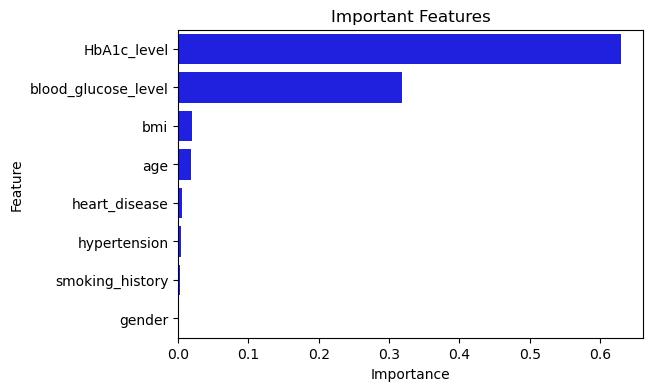

In [280]:
# plot a chart of important features 
plt.figure(figsize =(6, 4))
sns.barplot(data=feature_importance1_df.sort_values(by="Importance", ascending = False), x="Importance", y="Feature", color="Blue")
plt.title("Important Features")
plt.show()

#### SHAP Analysis

In [281]:
import shap
from sklearn.preprocessing import MinMaxScaler

In [282]:
print("SHAP values shape:", shap_values.shape)
print("Any NaN:", np.isnan(shap_values).any())
print("Min SHAP:", np.min(shap_values))
print("Max SHAP:", np.max(shap_values))
print("Mean |SHAP|:", np.mean(np.abs(shap_values)))

SHAP values shape: (20000, 8, 2)
Any NaN: False
Min SHAP: -0.6321434434264404
Max SHAP: 0.6321434434266395
Mean |SHAP|: 0.06087755552979793


In [283]:
print("Non-zero SHAP features:",
      (feature_importance_df["Mean |SHAP Value|"] > 0).sum())

Non-zero SHAP features: 8


In [284]:
# Best trained pipeline
best_pipeline1 = trained_for_shap1[best_model_name1]

# Extract trained model
model_step = best_pipeline1.named_steps["model"]

# Transform data using the same scaler
X_test_scaled = best_pipeline1.named_steps["scaler"].transform(xtest)

feature_names = xtest.columns

In [285]:
explainer1 = shap.TreeExplainer(model_step)
shap_values1 = explainer1.shap_values(X_test_scaled)

In [286]:
shap1_df = pd.DataFrame(
    shap_values1,
    columns=feature_names1
)

# Mean absolute SHAP importance
mean_shap_values1 = shap1_df.abs().mean().sort_values(ascending=False)

feature_importance1_df = pd.DataFrame({
    "Feature": mean_shap_values1.index,
    "Mean |SHAP Value|": mean_shap_values1.values
})

In [287]:
scaler = MinMaxScaler()
feature_importance1_df["Scaled |SHAP Value|"] = scaler.fit_transform(
    feature_importance1_df[["Mean |SHAP Value|"]]
)

C:\Users\josep\AppData\Local\Temp\ipykernel_11976\838467195.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


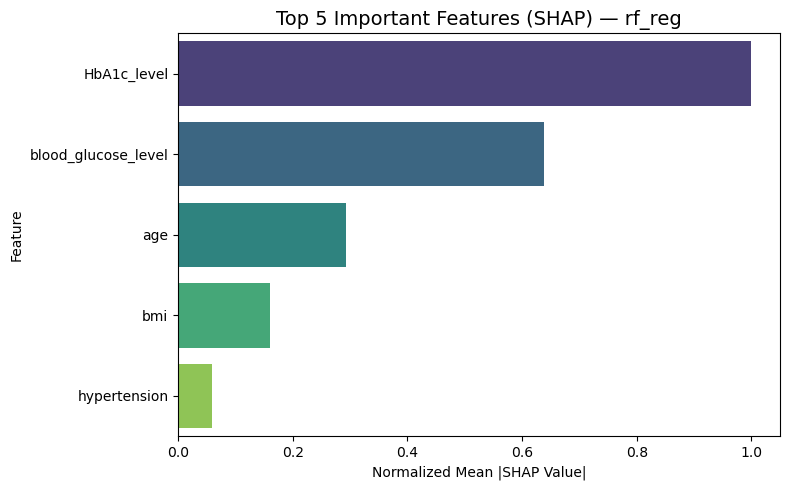

In [288]:
plt.figure(figsize=(8, 5))

sns.barplot(
    data=feature_importance1_df.head(5),
    x="Scaled |SHAP Value|",
    y="Feature",
    palette="viridis"
)

plt.title(
    f"Top 5 Important Features (SHAP) — {best_model_name1}",
    fontsize=14
)
plt.xlabel("Normalized Mean |SHAP Value|")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

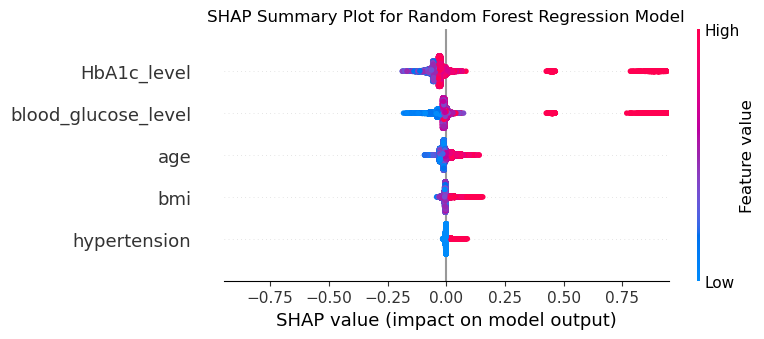

In [319]:
# Compute max absolute SHAP value
max_abs_shap = np.max(np.abs(shap_values1))

plt.figure(figsize=(8, 5))

shap.summary_plot(
    shap_values1,
    X_test_scaled,
    feature_names=feature_names1,
    max_display=5,
    show=False
)

# Force symmetric axis
plt.xlim(-max_abs_shap, max_abs_shap)
plt.title("SHAP Summary Plot for Random Forest Regression Model")

plt.tight_layout()
plt.show()


#### Insight

The SHAP summary plot reveals that the Random Forest regression model is also primarily driven by metabolic indicators, particularly HbA1c and blood glucose, with demographic and clinical factors such as age, BMI, and hypertension playing progressively smaller roles. This hierarchy aligns well with established clinical understanding and supports the model’s interpretability and face validity for health-related risk prediction

•	The SHAP summary plot for the Random Forest regression model illustrates both the relative importance of features and the direction of their effects on the model’s predictions. Features are ordered by decreasing mean absolute SHAP value, indicating their overall contribution to model output.

•	HbA1c level emerges as the most influential predictor. Higher HbA1c values (shown in red) are consistently associated with positive SHAP values, indicating a strong contribution toward increased predicted risk. Conversely, lower HbA1c values (blue) contribute negatively to the prediction. This pattern reflects the dominant role of long-term glycemic control in driving the model’s decisions.

•	The blood glucose level is the second most important feature and shows a similar directional effect. Elevated glucose levels are associated with positive SHAP values, reinforcing their role as a key risk factor, while lower values reduce the predicted outcome. The close alignment between HbA1c and blood glucose underscores the central importance of glycemic dysregulation in the model.

•	Age contributes moderately to the predictions, with higher age values generally increasing the model output. However, the narrower spread of SHAP values compared with glycemic markers indicates that age exerts a secondary, though still meaningful, influence.

•	Body mass index (BMI) shows a smaller but consistent effect, where higher BMI values tend to push predictions upward. The relatively compact SHAP distribution suggests that BMI modifies risk incrementally rather than acting as a dominant driver.

•	Finally, hypertension has the least impact among the displayed features. While the presence of hypertension tends to slightly increase the predicted outcome, its SHAP values are tightly clustered near zero, indicating a limited marginal contribution once other variables are accounted for.
